In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🔹 Load Dataset (Update the correct path)
file_path = "/content/drive/My Drive/nethura.xlsx"
df = pd.read_excel(file_path)

# 🔹 Clean Column Names (Remove special characters and spaces)
df.columns = df.columns.str.strip().str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

# 🔹 Handle Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df.dropna(axis=1, thresh=0.7*len(df), inplace=True)  # Drop columns with >30% missing values

# 🔹 Convert Date/Time Columns
date_columns = ['OUTAGE_START_DATE', 'OUTAGE_RESTORATION_DATE']
time_columns = ['OUTAGE_START_TIME', 'OUTAGE_RESTORATION_TIME']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

for col in time_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%I:%M:%S %p', errors='coerce').dt.time

# 🔹 Encode Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 🔹 Scale Numerical Features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 🔹 Save Preprocessed Dataset
preprocessed_path = "/content/drive/My Drive/preprocessed_nethura.xlsx"
df.to_excel(preprocessed_path, index=False)

print("✅ Preprocessing Completed. File saved at:", preprocessed_path)
print(df.head())  # Show preview


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-241af6355b79>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


✅ Preprocessing Completed. File saved at: /content/drive/My Drive/preprocessed_nethura.xlsx
        OBS      YEAR     MONTH  U_S__STATE  POSTAL_CODE  NERC_REGION  \
0 -1.730969  0.236797  0.231422   -0.094534    -0.096888    -1.319436   
1 -1.728718  1.014389 -0.384237   -0.094534    -0.096888    -1.319436   
2 -1.726467 -0.022400  1.154911   -0.094534    -0.096888    -1.319436   
3 -1.724216  0.495995 -0.076407   -0.094534    -0.096888    -1.319436   
4 -1.721965  1.273587  0.231422   -0.094534    -0.096888    -1.319436   

   CLIMATE_REGION  ANOMALY_LEVEL__numeric_  CLIMATE_CATEGORY  \
0       -1.027141                -0.277395          0.148532   
1       -1.027141                -0.006340          0.148532   
2       -1.027141                -1.903723         -1.262524   
3       -1.027141                -0.006340          0.148532   
4       -1.027141                 1.755514          1.559589   

  OUTAGE_START_DATE__Day_of_the_week__Month_Day__Year_  ...  \
0                    

✅ Dataset Loaded Successfully!


<ipython-input-7-83642d795503>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill categorical data
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6474 - loss: 0.6881 - val_accuracy: 0.8668 - val_loss: 0.3211 - learning_rate: 0.0050
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9054 - loss: 0.2466 - val_accuracy: 0.9112 - val_loss: 0.2085 - learning_rate: 0.0050
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9364 - loss: 0.1619 - val_accuracy: 0.9247 - val_loss: 0.1771 - learning_rate: 0.0050
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9488 - loss: 0.1224 - val_accuracy: 0.9208 - val_loss: 0.1965 - learning_rate: 0.0050
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9606 - loss: 0.1030 - val_accuracy: 0.9093 - val_loss: 0.2081 - learning_rate: 0.0050
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9603 - loss: 0.1098 - val_accuracy: 0.9035 - val_loss: 0.2428 - learning_rate: 0.0050
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9639 - loss: 0.0855 - val_a

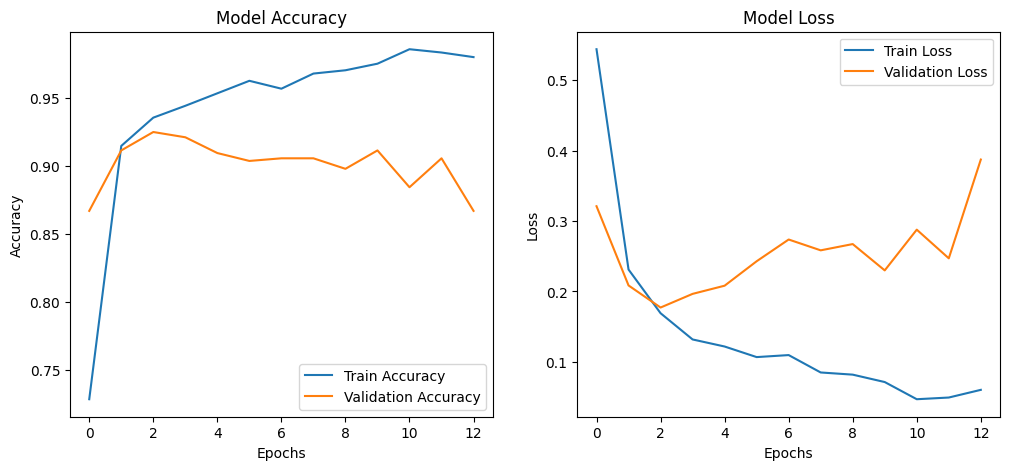

In [7]:
# ✅ Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ✅ Load Dataset from Drive
file_path = "/content/drive/My Drive/preprocessed_outage_dataset.xlsx"
df = pd.read_excel(file_path)

print("✅ Dataset Loaded Successfully!")

# ✅ Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical NaNs with median
df.fillna(method='ffill', inplace=True)  # Forward fill categorical data

# ✅ Convert Datetime Columns to Numeric
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col] = (df[col] - df[col].min()).dt.days

# ✅ Encode Categorical Data
df = pd.get_dummies(df, drop_first=True)

# ✅ Define Features (X) and Target (y)
target_col = "Blackout History (0/1) (1)"
X = df.drop(columns=[target_col])
y = df[target_col]

# ✅ Fix Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Build Optimized ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# ✅ Compile Model
optimizer = Adam(learning_rate=0.005)  # Lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Define Callbacks for Better Training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# ✅ Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler, early_stop])

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")

# ✅ Plot Training Performance
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ✅ Make Predictions
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print Results
print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall: {recall:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🎯 Accuracy: 0.9247
🎯 Precision: 0.9258
🎯 Recall: 0.9222
🎯 F1 Score: 0.9240
